In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
sns.set(rc = {'figure.figsize':(15,20)})
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv("dsInternShopify.csv")
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


We have got 7 columns of data and no non Null Values. The columns that should be integers are integers and that makes us feel good about the quality of our dataset. Yahoo!

Disclaimer: I thoroughly enjoyed working on this problem and I would love to more analysis on this dataset. I am hoping you will enjoy going through this analysis and I apologize for a longer answer, but I wanted to be thorough and perhaps you will appreciate that. :) 

# Question 1 (A)

When I look at the information on this dataset, I immediately think what if someone ordered 500 pairs of shoes? The order amount for that would be quite large and skew my answer for boiling down this dataset to just an average order value. No No No! I must be careful. And what if someone is selling rare sneakers for 30,000 dollars a piece. That will ridiculously skew my understanding of average order values. So, let us start with some exploratory statistical analysis. But before we do that, let us check that there are indeed exactly 100 different shops under shop_id and the date range of the orders is exactly 30 days

In [4]:
shop_id = data.shop_id.unique()
print('Minimum Shop ID: ', shop_id.min())
print('Maximum Shop ID: ', shop_id.max())
print('Number of Unique Shop IDs: ', shop_id.size)

Minimum Shop ID:  1
Maximum Shop ID:  100
Number of Unique Shop IDs:  100


In [5]:
data.created_at = pd.to_datetime(data.created_at)
print('Date Period Span:', data.created_at.max()-data.created_at.min())

Date Period Span: 29 days 23:47:26


Alrighty, it is now time to look at why is my average sale value $3145.13

Some basic statistical analysis on the order_amount

In [6]:
data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

<AxesSubplot:ylabel='order_amount'>

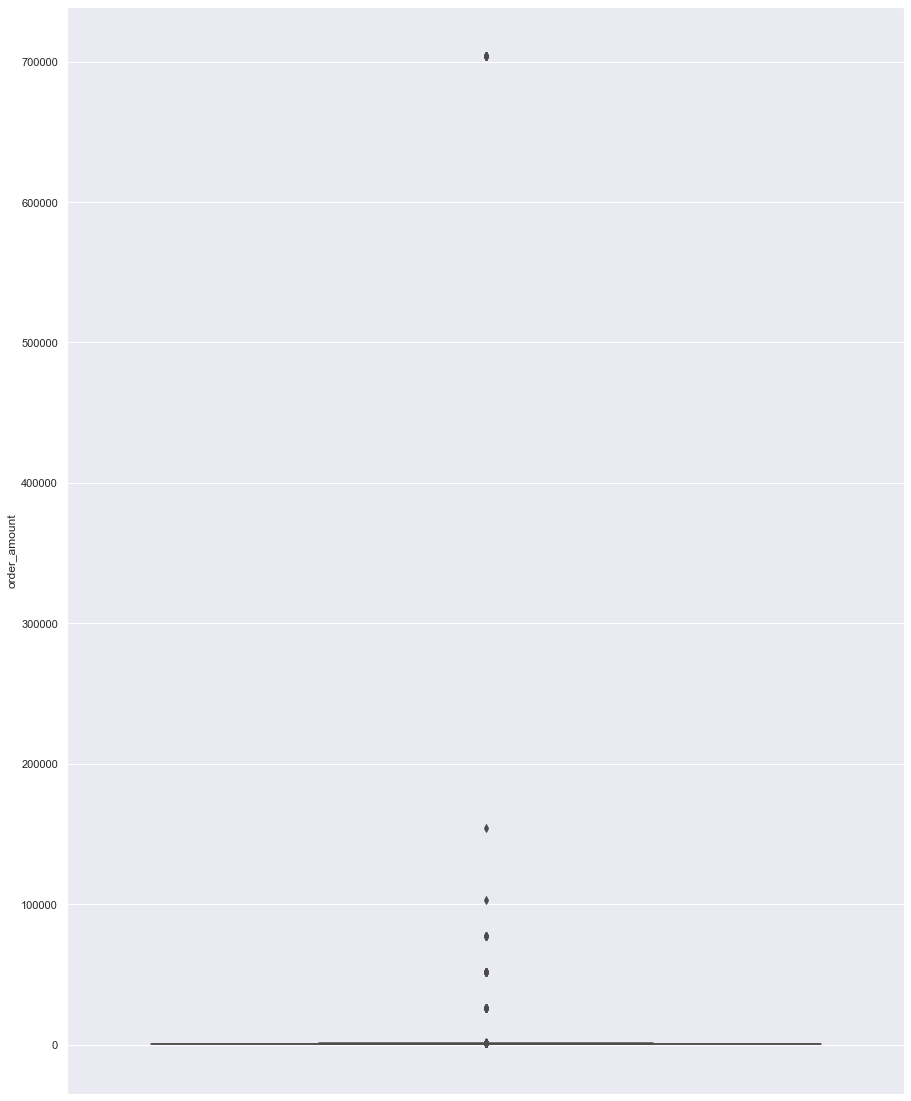

In [7]:
sns.boxplot(y=data.order_amount)

In [8]:
# Now would you look at that? We have got some incredible distribution of data and all I can say while looking at that box plot is that the information contained in this column can NOT be described by just an average order value number.
# I want to explore further why some orders had such a high order value? 

<AxesSubplot:xlabel='order_amount', ylabel='shop_id'>

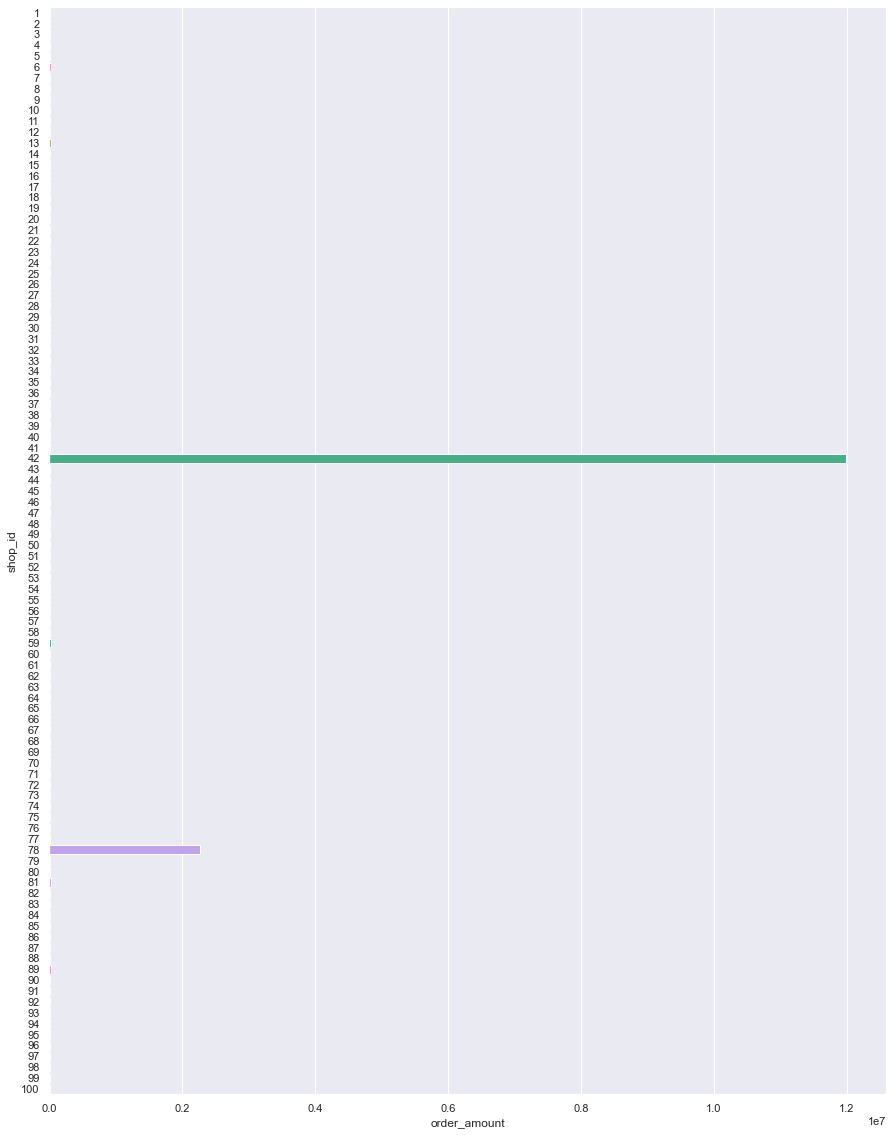

In [9]:
byShopID = data.groupby('shop_id', as_index = False)['order_amount'].sum()
byShopID.shop_id = byShopID.shop_id.astype(str)
sns.barplot(x='order_amount', y='shop_id', data = byShopID)

Looks like shop ID 42 and 78 have been processing some pretty extreme orders that is not representative of the overall dataset. Let us look at the raw data coressponding to these shops and make a decision on how to proceed further.

In [10]:
shop_id_list = [42, 78]
mask1 = data.shop_id.isin(shop_id_list)
data_42_78 = data[mask1]
data_42_78

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 07:23:14
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00


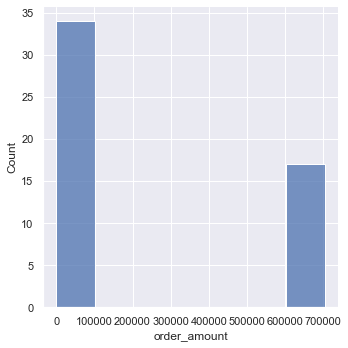

In [11]:
sns.displot(x='order_amount', data=data_42_78[data_42_78.shop_id == 42])

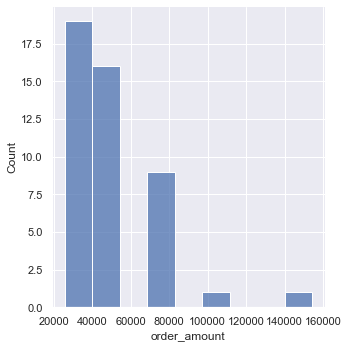

In [12]:
sns.displot(x='order_amount', data=data_42_78[data_42_78.shop_id == 78])

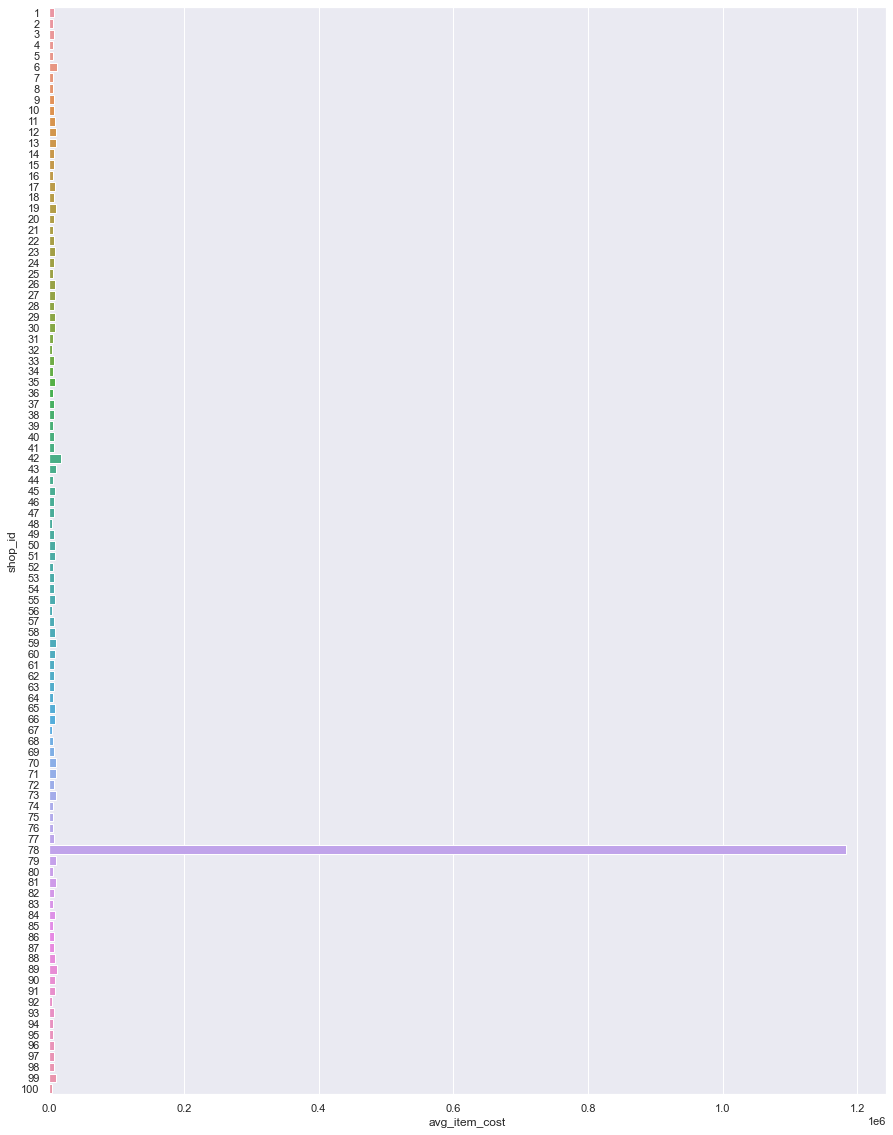

In [13]:
data['avg_item_cost'] = data.order_amount/data.total_items
byShopID2 = data.groupby('shop_id', as_index = False)['avg_item_cost'].sum()
byShopID2.shop_id = byShopID2.shop_id.astype(str)
ax = sns.barplot(x='avg_item_cost', y='shop_id', data = byShopID2)

This explains that shop_id 78 has been consistently selling items that has a higher price per item. There is no way for us to know if shop_id 78 only sells bundles of shoes and labels each bundle as 1 item or do they sell genuinely rare sneakers at those high prices per sneaker. Seems like the shop is an outlier to me and I would check in with the owner of shop_id 78 to further get a clarification on this. 

In [14]:
data[data.shop_id == 78].avg_item_cost.value_counts()

25725.0    46
Name: avg_item_cost, dtype: int64

Assume that I talked to the owner and they indicated that they sell a very special limited Edition Yeezy - Over 9999 sneaker that is indeed 25725 a piece. 
We shall create another column where we tag that order with 'what is this shoe?!' 

About shop_id 42, seems they have got a pretty reasonable per item cost, however they consistently have orders of 2000 items every now and then that is constituting to the high order_amount of 704,000. Let us verify that this is indeed the case. 

In [15]:
data[data.shop_id == 42].total_items.value_counts()
# let us tag values from our original dataset and call that 'bulk'

2000    17
1       15
2       13
3        3
4        2
5        1
Name: total_items, dtype: int64

In [16]:
# the organic shoe tag comes from the analysis that happened after this step. 
# I tied all tagging into a single step. Sorry for this very agile jump.
tags = ['ordinary', 'bulk', 'what is this shoe?!', 'organic_shoe']
def assign_tags(avg_item_cost, total_items):
    global tags
    if avg_item_cost == 25725:
        tag = tags[2]
    elif total_items == 2000:
        tag = tags[1]
    elif avg_item_cost >= 300:
        tag = tags[3]
    else: 
        tag = tags[0]
    return tag
data['order_tag'] = data[['avg_item_cost', 'total_items']].apply(lambda x: assign_tags(*x), axis = 1) 


In [17]:
data_2 = data[data.order_tag.isin([tags[0], tags[3]])]
data_2.order_amount.describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

<AxesSubplot:ylabel='order_amount'>

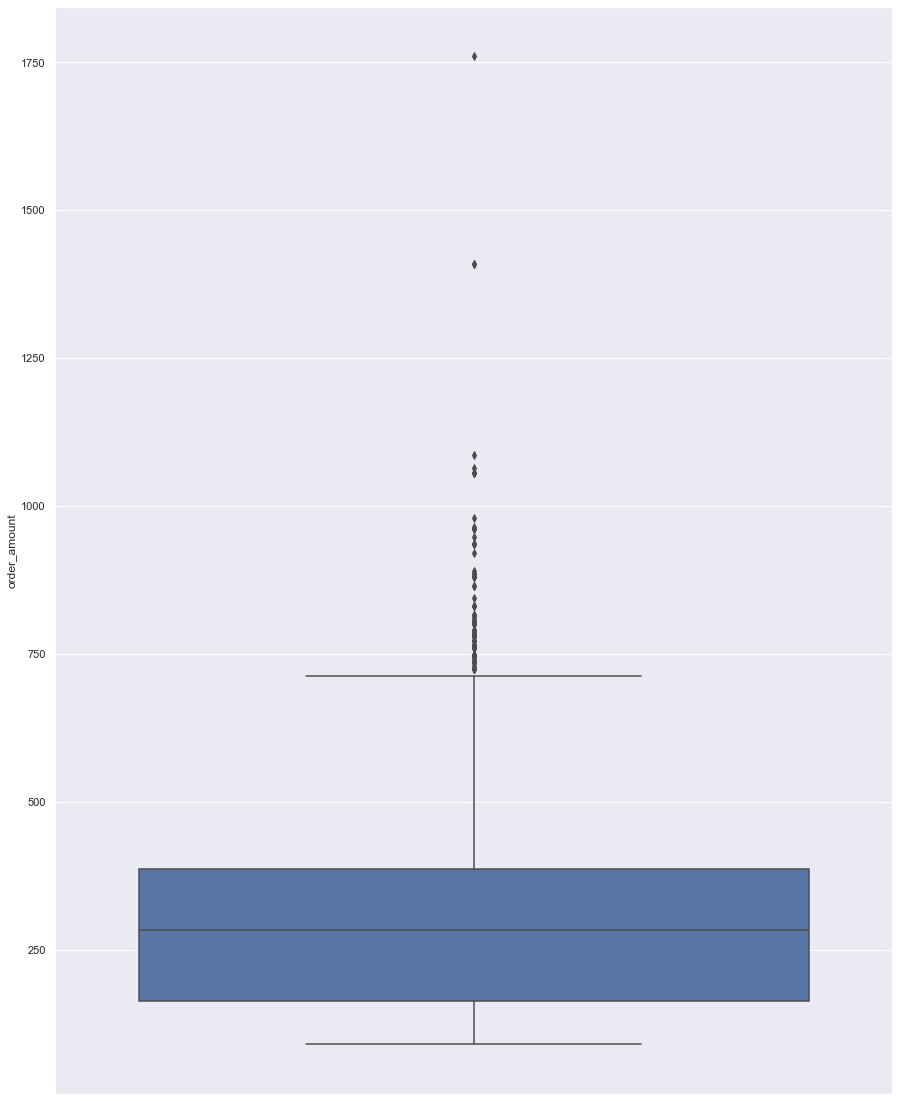

In [18]:
sns.boxplot(y='order_amount', data = data_2)

Looking at the boxplot, we've got some average orders outside of the 3 sigma bounds and let us explore what this data looks like.

In [19]:
sigma_ord = data_2.order_amount.std()
mean_ord = data_2.order_amount.mean()
data_2[data_2.order_amount >= mean_ord + 1.5*sigma_ord].total_items.value_counts()

4    194
5     75
3     72
2     13
6      8
8      1
Name: total_items, dtype: int64

In [20]:
data_2.groupby('total_items', as_index = False).order_amount.mean()

,total_items,order_amount
0,1,151.850911
1,2,303.520925
2,3,457.326180
3,4,598.534247
4,5,759.350649
5,6,888.750000
6,8,1064.000000


Now, what is it that I am trying to understand from this dataset will really define what I do next here. 
Say that I want to present a succint summary of this dataset with losing the least amount of information. 
My approach is to create a few graphs and showcase some key insights from here. 
### Graph 1: A trend between percentage of total items being sold in an order
We shall do a bar chart for presenting this information: 


<AxesSubplot:xlabel='total_items', ylabel='order_amount'>

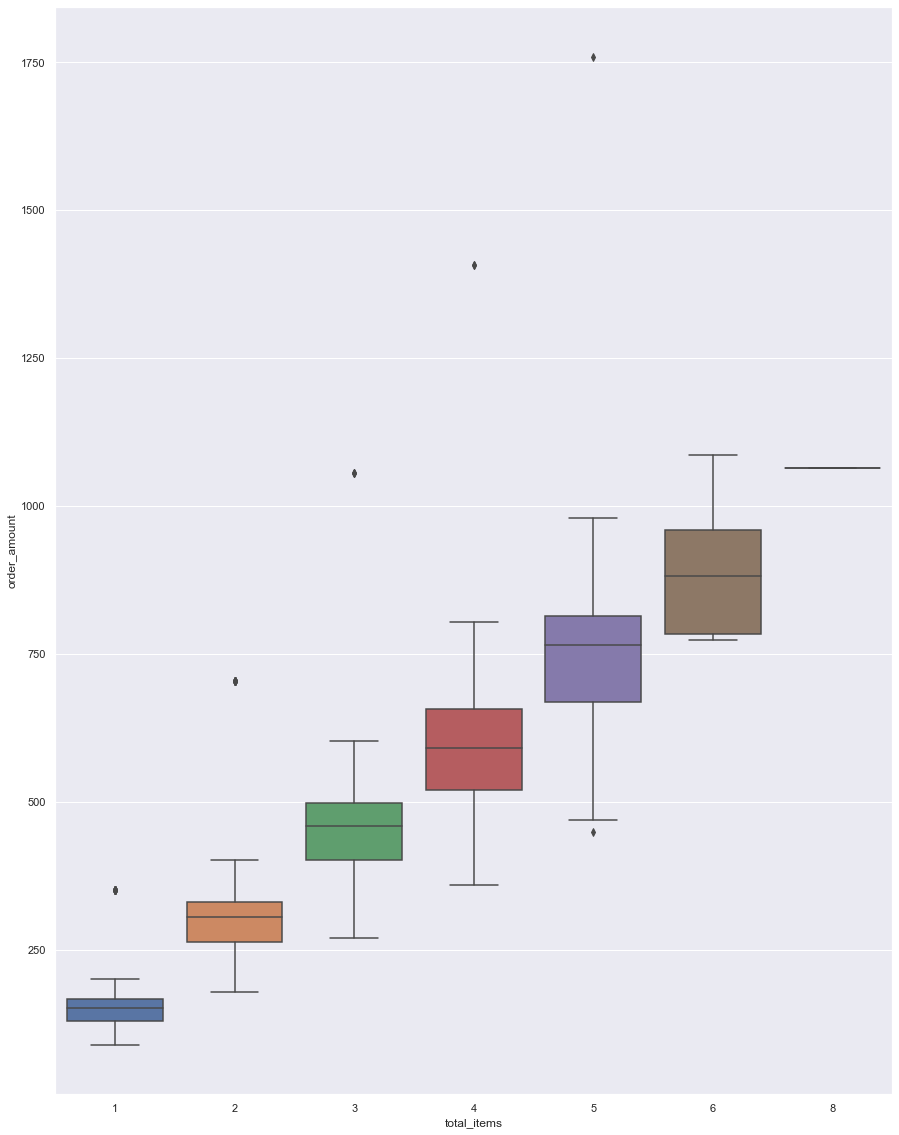

In [21]:
sns.boxplot(y='order_amount', x='total_items', data=data_2)

I see that we have consistently got an outlier between 1 and 5 items sold. Let us explore what this is. Shall We? 

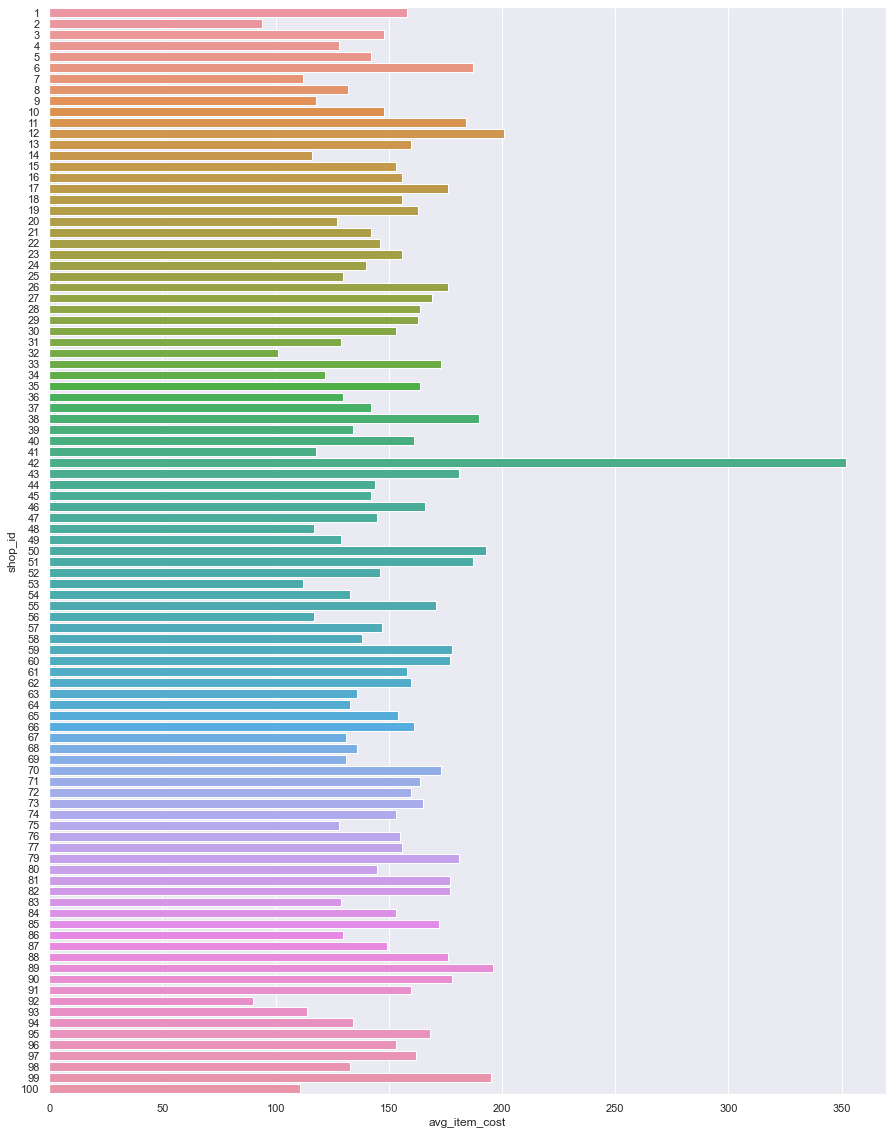

In [22]:
byShopID3 = data_2.groupby('shop_id', as_index = False)['avg_item_cost'].mean()
byShopID3.shop_id = byShopID3.shop_id.astype(str)
ax = sns.barplot(x='avg_item_cost', y='shop_id', data = byShopID3)

Aha! We see now that shop 42 generally sells expensive shoes compared to the other ones. Let us label an average item price of > 300 as 'organic_sneaker' @vessi, is that you? we, correct this in our tags function defined above. 

let us look at the box plots again, shall we?

The trend below excludes all data from shop_id's: [42 78]


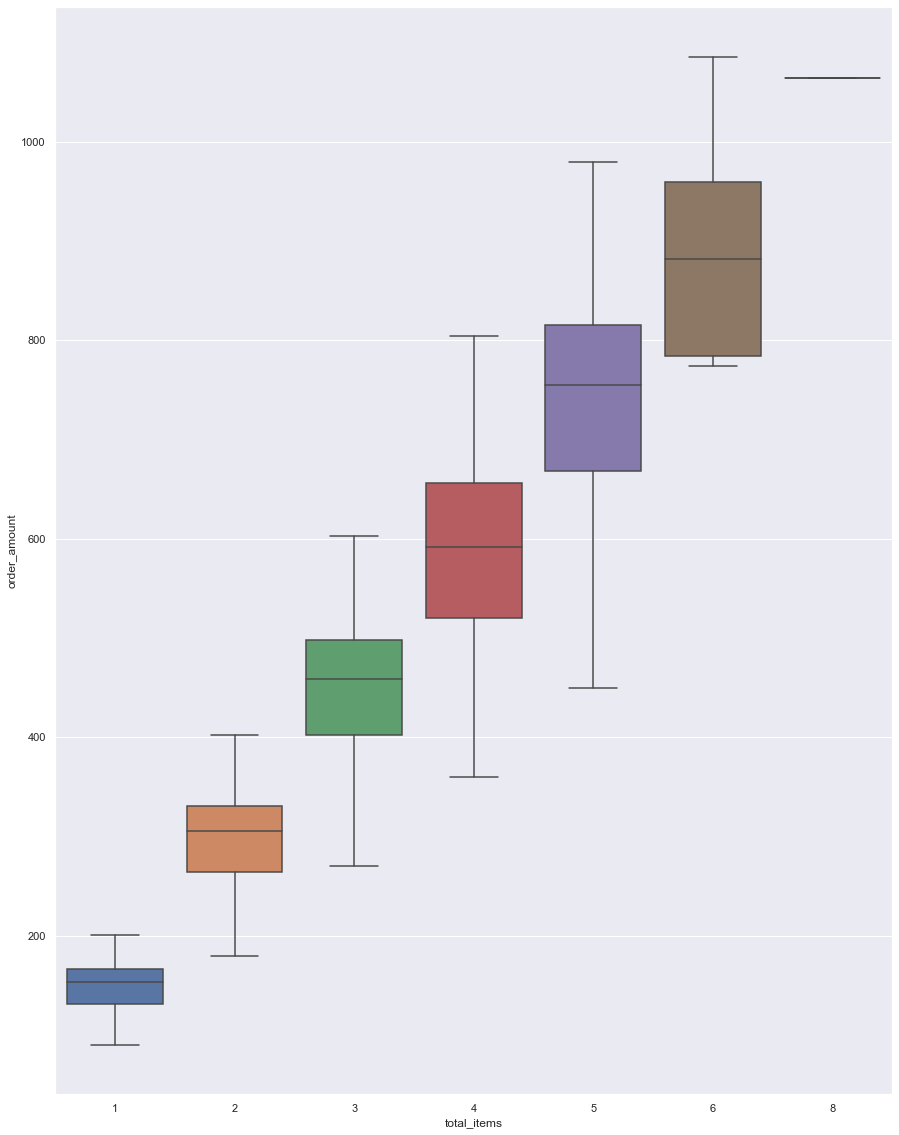

In [23]:
data_3 = data_2[data_2.order_tag == tags[0]] #tags0 = 'ordinary'
shop_id_ordinary = data_3.shop_id.unique()
snop_id_not_in_ordinary = np.setdiff1d(shop_id, shop_id_ordinary)
box_plot = sns.boxplot(y='order_amount', x='total_items', data=data_3)

print("The trend below excludes all data from shop_id's:", snop_id_not_in_ordinary)

Only NOW can I confidently say that shop_id 42 and 78 are the culprits for skewing my dataset since my hypothesis was proven by the statistical analysis. This may seem a redundant process but it is a thorough process and if one knows what they are doing this due diligence is not that difficult to do and yields an accurate analysis. 

Let us also learn what most of the orders look like
# Question 1 (B and C)

In [38]:
data_4 = data[~(data.order_tag.isin([tags[0]]))]
data_4.groupby('shop_id', as_index=False)[['order_amount', 'avg_item_cost']].apply(np.mean)

,shop_id,order_amount,avg_item_cost
0,42,235101.490196,352.0
1,78,49213.043478,25725.0



For most Shops (98 out of 100), as the number of orders increase the average order value increase in a linearly fashion as seen in the boxplot above. So for the dataset, I would report a table of total items and order value for all shops except 42 and 78. 

I would report that that shop 42 has some bulk orders of 2000 items every now and then and it also sells shoes that average ~352 dollars/shoe which is higher than most other shops. 

Shop 78 has been selling some really expensive shoes averaging 25725 dollars/shoe!!

In [37]:
data_3.groupby('total_items', as_index=False)[['order_amount', 'avg_item_cost']].apply(np.mean)
# does not include shop 42 and 78

,total_items,order_amount,avg_item_cost
0,1,150.179287,150.179287
1,2,300.633389,150.316694
2,3,455.392896,151.797632
3,4,592.951724,148.237931
4,5,746.184211,149.236842
5,6,888.750000,148.125000
6,8,1064.000000,133.000000


Takeaways:
1. Another key insight from this table is that at higher total items the average item cost drops, this could be possibly due to a discount that is being offered.
2. I would firther like to explore if there are some shops within this dataset that purchase in bulk at a lower cost per item and then resell it. 

***

# Question 2 (A): 54


# Question 2 (B): Peacock

# Question 2 (C): Steeleye Stout